# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv").fillna(0)
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,0,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,0,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,0,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,0,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
5,0,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7
6,0,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054
7,0,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,43847,53740,65778,83836,101657,121478,140886,161807,188172,188172
Italy,0,0,0,0,0,0,0,0,0,2,...,63927,69176,74386,80589,86498,92472,97689,101739,105792,105792
Spain,0,0,0,0,0,0,0,0,0,0,...,35136,39885,49515,57786,65719,73235,80110,87956,95923,95923
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81498,81591,81661,81782,81897,81999,82122,82198,82279,82279
Germany,0,0,0,0,0,1,4,4,4,5,...,29056,32986,37323,43938,50871,57695,62095,66885,71808,71808
France,0,0,2,3,3,3,4,5,5,5,...,20123,22622,25600,29551,33402,38105,40708,45170,52827,52827
Iran,0,0,0,0,0,0,0,0,0,0,...,23049,24811,27017,29406,32332,35408,38309,41495,44605,44605
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,6726,8164,9640,11812,14745,17312,19780,22453,25481,25481
Switzerland,0,0,0,0,0,0,0,0,0,0,...,8795,9877,10897,11811,12928,14076,14829,15922,16605,16605


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,1924,2247,2554,2985,3417,3904,4256,4579,5717,5717


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1].astype('int32')

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,infected
3/22/20,2020-03-22,1546
3/23/20,2020-03-23,1924
3/24/20,2020-03-24,2247
3/25/20,2020-03-25,2554
3/26/20,2020-03-26,2985
3/27/20,2020-03-27,3417
3/28/20,2020-03-28,3904
3/29/20,2020-03-29,4256
3/30/20,2020-03-30,4579
3/31/20,2020-03-31,5717


Text(0, 0.5, 'Number of cases')

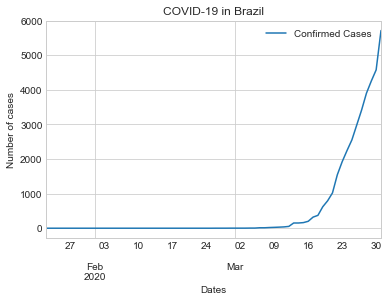

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,63927,69176,74386,80589,86498,92472,97689,101739,105792,105792


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
3/27/20,2020-03-27,86498
3/28/20,2020-03-28,92472
3/29/20,2020-03-29,97689
3/30/20,2020-03-30,101739
3/31/20,2020-03-31,105792


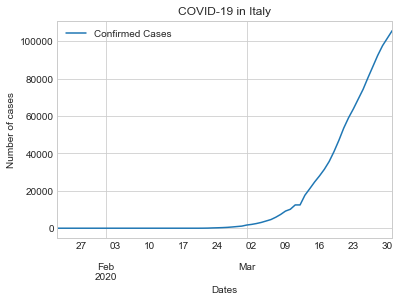

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotItaly.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()

## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [10]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
US,188172
Italy,105792
Spain,95923
China,82279
Germany,71808
...,...
MS Zaandam,2
Timor-Leste,1
Sierra Leone,1


### 3.1 Total de casos diários acumulados no Brasil

In [11]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,5717


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [12]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [13]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['infected']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([    0,   131,   261,   392,   522,   653,   784,   914,  1045,
        1174,  1305,  1436,  1566,  1697,  1828,  1958,  2089,  2219,
        2350,  2481,  2611,  2742,  2873,  3003,  3134,  3264,  3395,
        3526,  3656,  3787,  3917,  4048,  4179,  4309,  4440,  4571,
        4701,  4832,  4962,  5093,  5224,  5354,  5485,  5615,  5746,
        5877,  6007,  6138,  6269,  6399,  6530,  6660,  6791,  6922,
        7052,  7183,  7313,  7444,  7575,  7705,  7836,  7967,  8097,
        8228,  8358,  8489,  8620,  8750,  8881,  9012,  9142,  9273,
        9403,  9534,  9665,  9795,  9926, 10056, 10187, 10318, 10448,
       10579, 10710, 10840, 10971, 11101, 11232, 11363, 11493, 11624,
       11754, 11885, 12016, 12146, 12277])

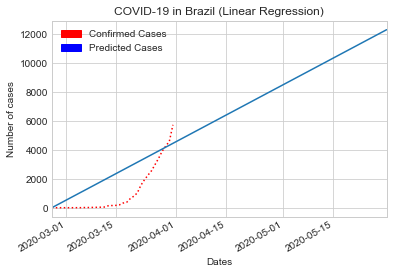

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 4.2 Polynomial Regression 2D

In [16]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

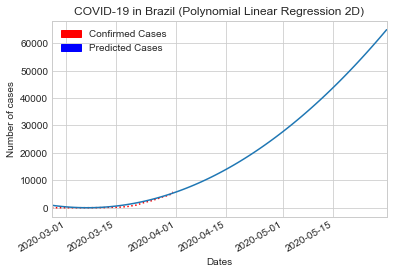

In [17]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

### 4.3 Polynomial Regression 3D

In [18]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

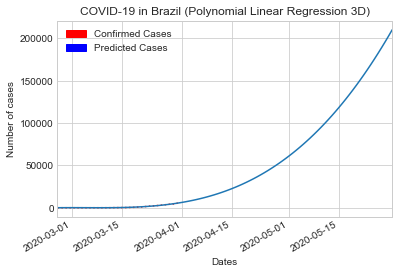

In [19]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 3D")

### 4.4 Polynomial Regression 4D

In [20]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

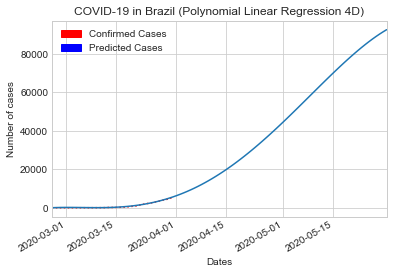

In [21]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")

### 4.5 Logistic and Exponential Curve

In [22]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [23]:
def exponential_model(x, a, b, c):
    return a*np.exp(b*(x-c+10))

In [24]:
import datetime

dfForPlotBrazil = dfForPlot
dfForPlotBrazil = dfForPlotBrazil[dfForPlotBrazil['infected'] > 0]
date_first_infection = dfForPlotBrazil['date'].iloc[0]

dfForPlotBrazil.loc[:,'date'] = dfForPlotBrazil['date'].map(lambda x: (x - date_first_infection).days)
dfForPlotBrazil

c:\users\pichau\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,infected
2/26/20,0,1
2/27/20,1,1
2/28/20,2,1
2/29/20,3,2
3/1/20,4,2
3/2/20,5,2
3/3/20,6,2
3/4/20,7,4
3/5/20,8,4
3/6/20,9,13


Infection speed     = 3.678
Total infected      = 7313
40 dias =  2020-04-06 00:00:00


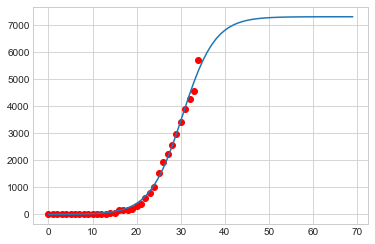

In [25]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(logistic_model, x, y, maxfev=100000)

sol = int(fsolve(lambda x: logistic_model(x, fit[0][0], fit[0][1], fit[0][2]) - int(fit[0][2]), fit[0][1]))
end = date_first_infection + datetime.timedelta(days=sol)

pred_x = list(range(max(x), sol))
y_l=[logistic_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_l, label="Logistic model")

peakday = date_first_infection + datetime.timedelta(days=fit[0][1])
print("Infection speed     = %.3f" % fit[0][0])
print("Total infected      = %.0f" % fit[0][2])
print("40 dias = ", date_first_infection + datetime.timedelta(days=40))

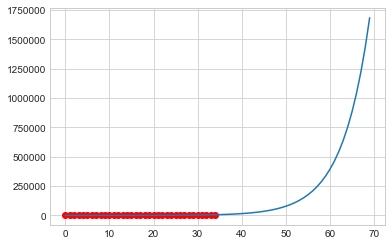

In [26]:
x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(exponential_model, x, y)

y_e = [exponential_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_e, label="Exponential model")